In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2024-02-26 09:08:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.207, 173.194.210.207, 173.194.211.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   185MB/s    in 0.8s    

2024-02-26 09:08:26 (185 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip



--2024-02-26 09:09:02--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  69.3MB/s    in 0.2s    

2024-02-26 09:09:02 (69.3 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
import os
import zipfile

zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')
zip_ref.close()
train_horse_dir= os.path.join('tmp/horse-or-human/horses')
train_human_dir= os.path.join('tmp/horse-or-humans/humans')

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [5]:
import tensorflow as tf

model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape= (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')


])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate= 1e-4),
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale =1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator= train_datagen.flow_from_directory(
    'tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_generator= validation_datagen.flow_from_directory(
    'tmp/horse-or-human/',
    target_size=(300,300),
    batch_size= 32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [20]:
EPOCHS = 20

history= model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs= EPOCHS,
    verbose=1,
    validation_data= validation_generator,
    validation_steps=8

)

Epoch 1/20
8/8 [==============================] - 124s 15s/step - loss: 0.6903 - accuracy: 0.5150 - val_loss: 0.6819 - val_accuracy: 0.5273
Epoch 2/20
8/8 [==============================] - 128s 14s/step - loss: 0.6856 - accuracy: 0.5517 - val_loss: 0.6753 - val_accuracy: 0.5195
Epoch 3/20
8/8 [==============================] - 159s 20s/step - loss: 0.6782 - accuracy: 0.5806 - val_loss: 0.6687 - val_accuracy: 0.5117
Epoch 4/20
8/8 [==============================] - 153s 19s/step - loss: 0.6649 - accuracy: 0.5762 - val_loss: 0.6480 - val_accuracy: 0.5938
Epoch 5/20
8/8 [==============================] - 151s 18s/step - loss: 0.6507 - accuracy: 0.6440 - val_loss: 0.6578 - val_accuracy: 0.4805
Epoch 6/20
8/8 [==============================] - 122s 15s/step - loss: 0.6471 - accuracy: 0.5962 - val_loss: 0.5843 - val_accuracy: 0.7969
Epoch 7/20
8/8 [==============================] - 117s 14s/step - loss: 0.6258 - accuracy: 0.6574 - val_loss: 0.5508 - val_accuracy: 0.7734
Epoch 8/20
8/8 [====

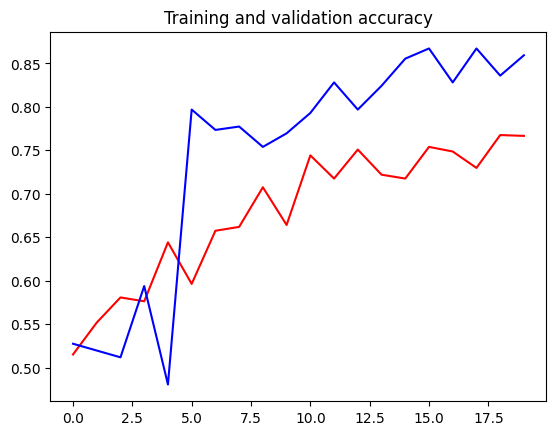

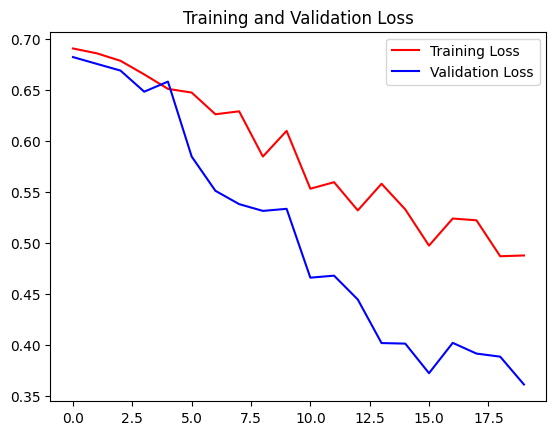

In [21]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs,loss,'r', label='Training Loss ')
plt.plot(epochs,val_loss,"b", label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()
plt.show()